<a href="https://colab.research.google.com/github/jerrybaba10/jerrybaba10/blob/main/Stockmarketprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## S&P500 PRICE PREDICTIONS

In this project, we want to implore machine learning techniques to predict the  tomorrow's price of the S&P500 index on the stock market

We start my importing the yahoo finance; yfinace module, where we will download the S&P500 historical data from.

In [1]:
import yfinance as yf

In [2]:
# specifying the S&P500 tiCker
sp500 = yf.Ticker("^GSPC")

In [3]:
#Downloading the data since the period when it S&P500 was established
sp500 = sp500.history(period ='max')
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-01 00:00:00-04:00,4201.270020,4245.640137,4197.740234,4237.859863,4224900000,0.0,0.0
2023-11-02 00:00:00-04:00,4268.259766,4319.720215,4268.259766,4317.779785,4669780000,0.0,0.0
2023-11-03 00:00:00-04:00,4334.229980,4373.620117,4334.229980,4358.339844,4570960000,0.0,0.0


Each. row in the table shows daily data of the S&P500. The first column is the date, followed by the opening price, the highest price of the index in the data, the lowest price of the index in the day, the closing price, and finally, the volume of market.

We will drop the last two columns for they are irrelevant to our analysis.

In [4]:
# Droping the irrelevant columns
del sp500 ['Dividends']
del sp500['Stock Splits']

In [5]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [6]:
import matplotlib.pyplot as plt


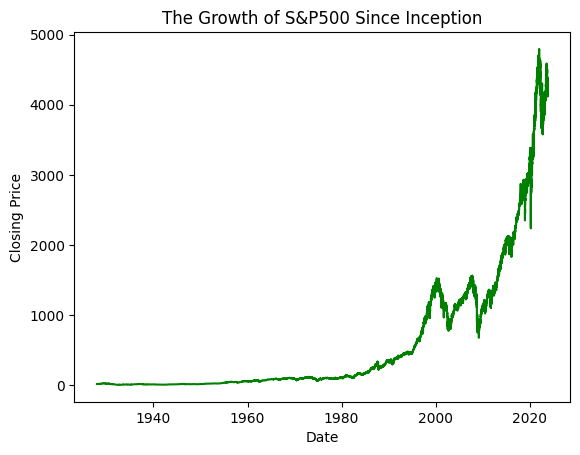

In [7]:
plt.plot(sp500['Close'], c = 'green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('The Growth of S&P500 Since Inception')

plt.show()

Obviously, those who were wise enough to have invested just about a dollar in the S&P500 from its inception, are walking away with thousands of dollars today. How fortunate! :)

Next, lets create a target column, this will be a column that tells us whether price will go up tomorrow or not.

We start by creating tommorrows column, which will contain the closing prices of today.

In [8]:
sp500['Tomorrow'] = sp500["Close"].shift(-1)
# sp500.head()

In [9]:
sp500.tail()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2023-11-01 00:00:00-04:00,4201.270020,4245.640137,4197.740234,4237.859863,4224900000,4317.779785
2023-11-02 00:00:00-04:00,4268.259766,4319.720215,4268.259766,4317.779785,4669780000,4358.339844
2023-11-03 00:00:00-04:00,4334.229980,4373.620117,4334.229980,4358.339844,4570960000,4365.979980
2023-11-06 00:00:00-05:00,4364.270020,4372.209961,4347.529785,4365.979980,3656340000,4378.379883
2023-11-07 00:00:00-05:00,4366.209961,4386.259766,4355.410156,4378.379883,3791230000,NaN


Lets fill the null value first.

In [10]:
sp500.isnull().sum()

Open        0
High        0
Low         0
Close       0
Volume      0
Tomorrow    1
dtype: int64

In [11]:
sp500['Tomorrow'].fillna(method='ffill', inplace = True)
sp500.tail()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2023-11-01 00:00:00-04:00,4201.270020,4245.640137,4197.740234,4237.859863,4224900000,4317.779785
2023-11-02 00:00:00-04:00,4268.259766,4319.720215,4268.259766,4317.779785,4669780000,4358.339844
2023-11-03 00:00:00-04:00,4334.229980,4373.620117,4334.229980,4358.339844,4570960000,4365.979980
2023-11-06 00:00:00-05:00,4364.270020,4372.209961,4347.529785,4365.979980,3656340000,4378.379883
2023-11-07 00:00:00-05:00,4366.209961,4386.259766,4355.410156,4378.379883,3791230000,4378.379883


In [12]:
sp500.isnull().sum().any()

False

The above column says there is no more null values in our data

Next, lets create a target column with zeros and ones.

In [13]:
sp500['target'] = (sp500['Tomorrow']>sp500.Close).astype(int)
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0


In [14]:
sp500.shape

(24079, 7)

Now, we will build our machine learning models on current data, at least data from 1990 to date. We will drop anything before 1990. Fundamentally, the economy in the 20th century is clearly not the same in this era. So including all that data will not in anyway improve our model.

In [56]:
current_sp500 = sp500.copy()
current_sp500 = current_sp500.loc["1990-10-01":]

In [16]:
current_sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,target
Date,,,,,,,
1990-10-01 00:00:00-04:00,306.100006,314.940002,306.100006,314.940002,202210000,315.209991,1
1990-10-02 00:00:00-04:00,314.940002,319.690002,314.940002,315.209991,188360000,311.399994,0
1990-10-03 00:00:00-04:00,315.209991,316.260010,310.700012,311.399994,135490000,312.690002,1
1990-10-04 00:00:00-04:00,311.399994,313.399994,308.589996,312.690002,145410000,311.500000,0
1990-10-05 00:00:00-04:00,312.690002,314.790009,305.760010,311.500000,153380000,313.480011,1


Now, we can build our models


Let's import our machine learning libraries

In [17]:
from sklearn.ensemble import RandomForestClassifier

We will split our data into train and test data. However, note that we can't use cross validation method of spliting with the timee series data, its just not practical, as we could be using future data to predict in the past.

In [18]:
train = current_sp500.iloc[:-100]
test = current_sp500.iloc[-100:]
train.shape, test.shape

((8240, 7), (100, 7))

In [47]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
predictors = ['Close', 'Volume', 'Open','High', 'Low']

model.fit(train[predictors], train['target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

To evaluate our prediction wee will use precision_score

In [20]:
from sklearn.metrics import precision_score
import pandas as pd


In [21]:
pred = model.predict(test[predictors])
pred = pd.DataFrame(pred)

In [22]:
score = precision_score(test['target'],pred)
score

0.4861111111111111

Our model is performing poorly. The model predicts with 48% accuracy. That's not good enough.

We need to improve it.

Next, we will build a more robust model that will improve prediction score.

#### We do this by backtesting

In [32]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train['target'])
  pred = model.predict(test[predictors])
  pred = pd.Series(pred, index = test.index, name='predictions')
  combined = pd.concat([test['target'], pred], axis =1)
  return combined

In order to backtest, we note that there about 250 training days in a year. So we want to train every 10 years of trading data, hence the 2500.

Thus, we will take the first 10 years of data to predict the 11th year, and take the first 11 years of data to predic the 12th-year and so on.

In [33]:
def backtest(data, model, predictors, start = 2500, step=250):
  all_predictions = []
  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions =predict(train, test, predictors,model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)


In [48]:
predictions = backtest(current_sp500, model, predictors)

In [49]:
predictions['predictions'].value_counts()

0    2435
1    2405
Name: predictions, dtype: int64

In [50]:
precision_score(predictions['target'], predictions['predictions'])

0.5305613305613306

Well, with our bactesting method, we have improved just a little of our model.




Next, we will lie to add some more predictors for our model and see if that will help improve our performance.

To do this, we will use rolling averages of the last 2 days, the last 5 days, and so on.

In [57]:
horizons = [2,5,60, 250, 1000]

new_predictors = []
for i in horizons:
  avgs = current_sp500.rolling(i).mean()
  ratio = f"close_ratio_{i}"
  current_sp500[ratio] = current_sp500["Close"]/avgs["Close"]

  trend = f"trend_{i}"
  current_sp500[trend] = current_sp500.shift(1).rolling(i).sum()['target']
  new_predictors  += [ratio, trend]

In [62]:
current_sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,target,close_ratio_2,trend_2,close_ratio_5,trend_5,close_ratio_60,trend_60,close_ratio_250,trend_250,close_ratio_1000,trend_1000
Date,,,,,,,,,,,,,,,,,
1990-10-01 00:00:00-04:00,306.100006,314.940002,306.100006,314.940002,202210000,315.209991,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-10-02 00:00:00-04:00,314.940002,319.690002,314.940002,315.209991,188360000,311.399994,0,1.000428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-10-03 00:00:00-04:00,315.209991,316.260010,310.700012,311.399994,135490000,312.690002,1,0.993920,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-10-04 00:00:00-04:00,311.399994,313.399994,308.589996,312.690002,145410000,311.500000,0,1.002067,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-10-05 00:00:00-04:00,312.690002,314.790009,305.760010,311.500000,153380000,313.480011,1,0.998094,1.0,0.994737,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There NaN values, so, we will drop them

In [63]:
current_sp500 = current_sp500.dropna()
current_sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,target,close_ratio_2,trend_2,close_ratio_5,trend_5,close_ratio_60,trend_60,close_ratio_250,trend_250,close_ratio_1000,trend_1000
Date,,,,,,,,,,,,,,,,,
1994-09-14 00:00:00-04:00,467.549988,468.859985,466.820007,468.799988,297480000,474.809998,1,1.001378,2.0,1.000068,3.0,1.022145,34.0,1.016437,135.0,1.125711,515.0
1994-09-15 00:00:00-04:00,468.799988,474.809998,468.790009,474.809998,281920000,471.190002,0,1.006369,2.0,1.012168,3.0,1.034367,35.0,1.029292,136.0,1.139706,515.0
1994-09-16 00:00:00-04:00,474.809998,474.809998,470.059998,471.190002,410750000,470.850006,0,0.996173,1.0,1.003164,3.0,1.025806,34.0,1.021283,136.0,1.130583,515.0
1994-09-19 00:00:00-04:00,471.209991,473.149994,470.679993,470.850006,277110000,463.359985,0,0.999639,0.0,1.000463,3.0,1.024278,34.0,1.020416,135.0,1.129339,514.0
1994-09-20 00:00:00-04:00,470.829987,470.829987,463.359985,463.359985,326050000,461.459991,0,0.991983,0.0,0.986288,2.0,1.007233,34.0,1.004135,134.0,1.110969,514.0


In [64]:
current_sp500.isnull().sum().any()

False

Now, lets see how this performs

Before we do that, lets improve our prediction function a bit.  Instead of giving a probability of 50-50 for a price going up or down, lets ennsure that a price is considered to go inly if the predictions returns a probability of at least $60\%$

In [87]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train['target'])
  pred = model.predict_proba(test[predictors])[:,1]
  pred[pred>=.6] = 1
  pred[pred<.6] = 0
  pred = pd.Series(pred, index = test.index, name='predictions')
  combined = pd.concat([test['target'], pred], axis =1)
  return combined

In [88]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=100, random_state=1)


In [89]:
predictions = backtest(current_sp500, model, new_predictors)

In [90]:
predictions['predictions'].value_counts()

0.0    4113
1.0     727
Name: predictions, dtype: int64

In [92]:
precision_score(predictions['target'], predictions['predictions'])

0.5529573590096286

Well, not too great, but good enough performance of $55\%$

That means that, when with our model, when we say that they price of S&P500 index will go up the next day, we are $55\%$ correct.

Obviously, more work can be done on this model to increase performance and to be able to use to make investment decisions.

## Thank you for the read.